In [1]:
import nbimporter
import import_ipynb


import os
import sys

def add_path_to_sys(path):
    module_path = os.path.abspath(path)
    if module_path not in sys.path:
        sys.path.append(module_path)

usePath = os.path.join(r'c:', os.sep,'Users','scrwh','Documents','PythonScripts')
add_path_to_sys(usePath)


# import ModelsListDiffFuntions
# from ModelsListDiffFuntions import *

# # List all the functions defined in the other notebook
# print(dir(ModelsListDiffFuntions))

import Functions
from Functions import *

# List all the functions defined in the other notebook
print(dir(Functions))

['FolderTree', 'IMREAD_COLOR', 'IMREAD_UNCHANGED', 'Image', 'ImageDataGenerator', 'ImageFile', 'ModelsListDiffFuntions', 'Path', 'Pool', 'PureWindowsPath', 'RMSprop', 'StringIO', 'WindowsPath', '__builtins__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'accuracy_score', 'add_path_to_sys', 'classification_report', 'compress_layers', 'confusion_matrix', 'copy_and_open', 'cpu_count', 'cv2', 'datetime', 'display', 'display_one', 'get_file_list', 'get_file_list_imgs', 'get_image_paths', 'get_ipython', 'glob', 'gridspec', 'hashlib', 'image', 'import_ipynb', 'io', 'jsonize', 'la', 'laplace', 'loadImages', 'lru_cache', 'nbimporter', 'np', 'os', 'pd', 'platform', 'plt', 'print_dim_tuple', 'print_layers', 'processing', 'product', 'pywt', 'random', 'random_sample', 're', 'requests', 'resize', 'rgb2gray', 'sep', 'sequential_model_to_ascii_printout', 'shutil', 'sklearn', 'sns', 'splitfolders', 'sporco', 'struct', 'subprocess', 'tf', 'time', 'torch', 'tqdm', 'train_t

In [2]:
sepp = os.path.sep

testDir = os.path.join('..','Synthetic_data','Fault_types - Copy').replace(os.path.sep, '/')
# C:\Users\scrwh\Documents\PythonScripts\Master_Thesis\Function\Synthetic_data\Fault_types - Copy
testDir

'../Synthetic_data/Fault_types - Copy'

In [3]:
data_folder = os.path.join('..','..', 'data', 'data4d').replace(os.path.sep, '/')
data_folder

'../../data/data4d'

In [4]:
DataFileList = get_file_list_imgs(testDir)
len(DataFileList)

2007

In [5]:
DataFileListCNN = get_file_list_imgs(data_folder)
len(DataFileListCNN)

29006

In [8]:
import os
import cv2
import numpy as np
import pandas as pd

def generate_image_df(imageList):
    df = pd.DataFrame()
    
    imageList = get_image_paths(imageList)
    
    paths = np.array(imageList)
    filenames = np.array([os.path.basename(path) for path in paths])
    directories = np.array([os.path.dirname(path) for path in paths])
    extensions = np.array([os.path.splitext(path)[1] for path in paths])
    split_classes = np.array(['train' if 'train' in path else 'val' if 'val' in path else 'test' if 'test' in path else None for path in paths])
    type_classes = np.array([path.split(os.path.sep)[-2] for path in paths])
    
    df['path'] = paths
    df['filename'] = filenames
    df['directory'] = directories
    df['extension'] = extensions
    df['splitClass'] = split_classes
    df['typeClass'] = type_classes
    
    image_data = [cv2.imread(path) for path in paths]
    shapes = np.array([img.shape for img in image_data])
    
    df[['height', 'width', 'channels']] = shapes
    df['aspect_ratio'] = shapes[:, 1] / shapes[:, 0]
    
    gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in image_data]
    blur_levels = np.array([cv2.Laplacian(img, cv2.CV_64F).var() for img in gray_images])
    df['blur_level'] = blur_levels
    df['blurry'] = blur_levels < 30
    
    dpi = plt.gcf().dpi
    resolutions = shapes[:, 0] / dpi
    df['resolution'] = resolutions
    
    color_modes = np.array([img.shape[2] for img in image_data])
    df['color_mode'] = color_modes
    
    mean_intensities = np.array([img.mean() for img in image_data])
    df['mean_intensity'] = mean_intensities
    
    sharpness = np.array([cv2.Laplacian(img, cv2.CV_64F).var() for img in gray_images])
    df['sharpness'] = sharpness
    
    threshold = 200
    proportions = np.array([np.sum(img > threshold) / img.size for img in gray_images])
    df['above_threshold_prop'] = proportions
    
    # color_props = []
    # for img in image_data:
    #     if img.shape[2] == 3:
    #         color_props.append(np.sum(img[:,:,0]) / (img.size * 255))
    #     else:
    #         color_props.append(None)
    # df[['red_prop', 'green_prop', 'blue_prop']] = color_props

    # color_props = []
    # for img in image_data:
    #     if img.shape[2] == 3:
    #         color_props.append(np.sum(img[:,:,0]) / (img.size * 255))
    #     else:
    #         color_props.append([None, None, None])  # Append a list of None for grayscale images
    # df[['red_prop', 'green_prop', 'blue_prop']] = color_props

    color_props = []
    for img in image_data:
        if img.shape[2] == 3:
            red_prop = np.sum(img[:,:,0]) / (img.size * 255)
            green_prop = np.sum(img[:,:,1]) / (img.size * 255)
            blue_prop = np.sum(img[:,:,2]) / (img.size * 255)
            color_props.append((red_prop, green_prop, blue_prop))
        else:
            color_props.append([None, None, None])  # Append a list of None for grayscale images
    df[['red_prop', 'green_prop', 'blue_prop']] = color_props


    
    # color_stats = np.array([cv2.meanStdDev(img) for img in image_data])
    # df['mean_red'] = color_stats[:, 2, 0]
    # df['mean_green'] = color_stats[:, 1, 0]
    # df['mean_blue'] = color_stats[:, 0, 0]
    # df['std_red'] = color_stats[:, 2, 1]
    # df['std_green'] = color_stats[:, 1, 1]
    # df['std_blue'] = color_stats[:, 0, 1]

    color_stats = np.array([cv2.meanStdDev(img) for img in image_data])
    df['mean_red'] = color_stats[:, 0, 2]
    df['mean_green'] = color_stats[:, 0, 1]
    df['mean_blue'] = color_stats[:, 0, 0]
    df['std_red'] = color_stats[:, 1, 2]
    df['std_green'] = color_stats[:, 1, 1]
    df['std_blue'] = color_stats[:, 1, 0]

    
    is_gray = np.array([len(img.shape) == 2 or img.shape[2] == 1 or (img[:,:,0] == img[:,:,1]).all() for img in image_data])
    df['grayscale'] = is_gray
    
    dominant_color = []
    for img in image_data:
        if img.shape[2] == 3:
            pixels = np.float32(img.reshape(-1, 3))
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
            _, labels, centers = cv2.kmeans(pixels, 1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
            dominant_color.append(centers[0] / 255)
        else:
            dominant_color.append(None)
    df[['dominant_color_r', 'dominant_color_g', 'dominant_color_b']] = dominant_color
    
    brightness = np.array([cv2.mean(img)[0] for img in image_data])
    df['brightness'] = brightness
    
    contrast = []
    for img in gray_images:
        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        hist_norm = hist.ravel() / hist.sum()
        Q = hist_norm.cumsum()
        bins = np.arange(256)
        fn_min = np.inf
        for i in range(1,256):
            p1, p2 = np.hsplit(hist_norm, [i])
            q1, q2 = Q[i], Q[255] - Q[i]
            if q1 == 0:
                q1 = 0.0000001
            if q2 == 0:
                q2 = 0.0000001
            b1, b2 = np.hsplit(bins, [i])
            m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
            v1, v2 = np.sum(((b1 - m1)**2) * p1) / q1, np.sum(((b2 - m2)**2) * p2) / q2
            fn = v1 * q1 + v2 * q2
            if fn < fn_min:
                fn_min = fn
                thresh = i
        contrast.append(fn_min)
    df['contrast'] = contrast
    
    std_intensities = np.array([np.std(img) for img in image_data])
    df['std_intensity'] = std_intensities
    max_intensities = np.array([np.max(img) for img in image_data])
    df['max_intensity'] = max_intensities
    min_intensities = np.array([np.min(img) for img in image_data])
    df['min_intensity'] = min_intensities
    
    return df


In [9]:

start_times = datetime.now()
print(f'Started: {start_times}')

imagedf = generate_image_df(DataFileList)


end_times = datetime.now()
print(f'Ended: {end_times}')
print(f'Duration: {end_times - start_times}')

Started: 2023-09-04 22:08:35.297062
Ended: 2023-09-04 22:10:41.617649
Duration: 0:02:06.320587


<Figure size 640x480 with 0 Axes>

In [14]:
random_imagedf = imagedf.sample(n=10, random_state=42) 
random_imagedf

,path,filename,directory,extension,splitClass,typeClass,height,width,channels,aspect_ratio,...,std_blue,grayscale,dominant_color_r,dominant_color_g,dominant_color_b,brightness,contrast,std_intensity,max_intensity,min_intensity
1960,../Synthetic_data/Fault_types - Copy\rough_scr...,2C8A1612.JPG,../Synthetic_data/Fault_types - Copy\rough_scr...,.JPG,None,rough_scratch,170,256,3,1.505882,...,55.224025,False,0.438580,0.475424,0.514704,111.837983,821.190185,58.349070,255,0
526,../Synthetic_data/Fault_types - Copy\Cracks\9f...,9f444dcd-05fb-4940-991d-4203447ac1dc.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,235,256,3,1.089362,...,47.865315,False,0.332696,0.387405,0.417865,84.837483,531.997395,48.063752,195,7
393,../Synthetic_data/Fault_types - Copy\Cracks\45...,45e5c73a-4539-447f-9afe-5c4c968f1c2f.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,256,256,3,1.000000,...,4.169765,False,0.939744,0.902742,0.874967,239.634842,4.197219,7.949814,248,152
1402,../Synthetic_data/Fault_types - Copy\dirt\DJI_...,DJI_0633_08_04_png.rf.082e8b9625f67728b5622560...,../Synthetic_data/Fault_types - Copy\dirt,.jpg,None,dirt,371,586,3,1.579515,...,38.292748,False,0.301528,0.326993,0.318136,76.889695,59.956298,34.992862,121,0
433,../Synthetic_data/Fault_types - Copy\Cracks\63...,6333de831f4a0energies-15-05672-g011.png,../Synthetic_data/Fault_types - Copy\Cracks,.png,None,Cracks,1105,1335,3,1.208145,...,52.727867,False,0.828778,0.823527,0.771806,210.917594,641.135032,58.112267,255,0
576,../Synthetic_data/Fault_types - Copy\Cracks\c0...,c0a86ef8-1149-43d1-b87e-a6092e6604ca.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,258,256,3,0.992248,...,45.259321,False,0.340488,0.355912,0.363097,86.824491,267.577849,42.242974,162,29
1869,../Synthetic_data/Fault_types - Copy\rough_scr...,2C8A0202.JPG,../Synthetic_data/Fault_types - Copy\rough_scr...,.JPG,None,rough_scratch,170,256,3,1.505882,...,71.419647,False,0.466829,0.503399,0.475584,119.041475,620.433786,67.805926,251,7
429,../Synthetic_data/Fault_types - Copy\Cracks\61...,61a74833-a717-42cc-b919-bd24660f2ebe.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,223,256,3,1.147982,...,4.857228,False,0.609670,0.604867,0.595654,155.465965,8.267140,4.883117,165,42
610,../Synthetic_data/Fault_types - Copy\Cracks\cr...,cracks_15.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,108,162,3,1.500000,...,17.417763,True,0.971997,0.971997,0.971997,247.859282,72.840631,17.417763,255,102
530,../Synthetic_data/Fault_types - Copy\Cracks\a0...,a01d449a-d9e5-4637-bb81-23164bee8560.jpg,../Synthetic_data/Fault_types - Copy\Cracks,.jpg,None,Cracks,296,256,3,0.864865,...,53.362023,False,0.371062,0.417276,0.444885,94.620777,461.863323,51.798442,196,8


In [17]:
column_names = imagedf.columns
column_names

Index(['path', 'filename', 'directory', 'extension', 'splitClass', 'typeClass',
       'height', 'width', 'channels', 'aspect_ratio', 'blur_level', 'blurry',
       'resolution', 'color_mode', 'mean_intensity', 'sharpness',
       'above_threshold_prop', 'red_prop', 'green_prop', 'blue_prop',
       'mean_red', 'mean_green', 'mean_blue', 'std_red', 'std_green',
       'std_blue', 'grayscale', 'dominant_color_r', 'dominant_color_g',
       'dominant_color_b', 'brightness', 'contrast', 'std_intensity',
       'max_intensity', 'min_intensity'],
      dtype='object')

In [12]:

start_times = datetime.now()
print(f'Started: {start_times}')

imagedfSplit = generate_image_df(DataFileListCNN)


end_times = datetime.now()
print(f'Ended: {end_times}')
print(f'Duration: {end_times - start_times}')

Started: 2023-09-04 22:11:07.195218
Ended: 2023-09-04 22:17:47.529656
Duration: 0:06:40.334438


<Figure size 640x480 with 0 Axes>

In [15]:
imagedfSplit

,path,filename,directory,extension,splitClass,typeClass,height,width,channels,aspect_ratio,...,std_blue,grayscale,dominant_color_r,dominant_color_g,dominant_color_b,brightness,contrast,std_intensity,max_intensity,min_intensity
0,../../data/data4d\test\clean\resized_2C8A0837.JPG,resized_2C8A0837.JPG,../../data/data4d\test\clean,.JPG,test,clean,162,244,3,1.506173,...,28.350089,False,0.581893,0.608114,0.654157,148.382817,226.746391,28.810828,212,5
1,../../data/data4d\test\clean\resized_2C8A0848.JPG,resized_2C8A0848.JPG,../../data/data4d\test\clean,.JPG,test,clean,162,244,3,1.506173,...,46.611414,False,0.516574,0.537838,0.577332,131.726422,454.535051,46.590219,212,23
2,../../data/data4d\test\clean\resized_DJI_0053_...,resized_DJI_0053_07_04_png.rf.2ad528665ae939b3...,../../data/data4d\test\clean,.jpg,test,clean,154,244,3,1.584416,...,59.148440,False,0.524229,0.555236,0.526658,133.678385,192.231952,39.349412,231,0
3,../../data/data4d\test\clean\resized_DJI_0093_...,resized_DJI_0093_02_03_png.rf.60f76c2c17e215b5...,../../data/data4d\test\clean,.jpg,test,clean,154,244,3,1.584416,...,64.764687,False,0.415714,0.582994,0.544722,106.007052,84.056649,51.500441,255,22
4,../../data/data4d\test\clean\resized_DJI_0095_...,resized_DJI_0095_02_03_png.rf.321f12fe6155e3d4...,../../data/data4d\test\clean,.jpg,test,clean,154,244,3,1.584416,...,66.753871,False,0.452119,0.593636,0.540683,115.290292,191.901731,55.059305,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,../../data/data4d\val\Rust\resized_synthetic_9...,resized_synthetic_994.jpg,../../data/data4d\val\Rust,.jpg,val,Rust,150,244,3,1.626667,...,78.164708,False,0.588088,0.610595,0.620094,149.962486,1380.665014,77.076096,255,0
29002,../../data/data4d\val\Rust\resized_synthetic_9...,resized_synthetic_995.jpg,../../data/data4d\val\Rust,.jpg,val,Rust,198,244,3,1.232323,...,122.010840,False,0.567571,0.554788,0.554679,144.730605,144.837841,120.246746,255,0
29003,../../data/data4d\val\Rust\resized_synthetic_9...,resized_synthetic_997.jpg,../../data/data4d\val\Rust,.jpg,val,Rust,168,244,3,1.452381,...,36.141696,False,0.303192,0.297851,0.293986,77.313939,52.364526,35.480469,138,0
29004,../../data/data4d\val\Rust\resized_synthetic_9...,resized_synthetic_998.jpg,../../data/data4d\val\Rust,.jpg,val,Rust,175,244,3,1.394286,...,90.656531,False,0.429977,0.433404,0.429754,109.644215,1303.957704,90.247553,236,0


In [16]:
column_names = imagedfSplit.columns
column_names

Index(['path', 'filename', 'directory', 'extension', 'splitClass', 'typeClass',
       'height', 'width', 'channels', 'aspect_ratio', 'blur_level', 'blurry',
       'resolution', 'color_mode', 'mean_intensity', 'sharpness',
       'above_threshold_prop', 'red_prop', 'green_prop', 'blue_prop',
       'mean_red', 'mean_green', 'mean_blue', 'std_red', 'std_green',
       'std_blue', 'grayscale', 'dominant_color_r', 'dominant_color_g',
       'dominant_color_b', 'brightness', 'contrast', 'std_intensity',
       'max_intensity', 'min_intensity'],
      dtype='object')

In [ ]:
imagedf.info

In [25]:
imagedf.describe

<bound method NDFrame.describe of                                                    path  \
0     ../Synthetic_data/Fault_types - Copy\Bird stri...   
1     ../Synthetic_data/Fault_types - Copy\clean\2C8...   
2     ../Synthetic_data/Fault_types - Copy\clean\2C8...   
3     ../Synthetic_data/Fault_types - Copy\clean\2C8...   
4     ../Synthetic_data/Fault_types - Copy\clean\2C8...   
...                                                 ...   
2002  ../Synthetic_data/Fault_types - Copy\Rust\DJI_...   
2003  ../Synthetic_data/Fault_types - Copy\Rust\DJI_...   
2004  ../Synthetic_data/Fault_types - Copy\Rust\DJI_...   
2005  ../Synthetic_data/Fault_types - Copy\Rust\DJI_...   
2006  ../Synthetic_data/Fault_types - Copy\Rust\DJI_...   

                                               filename  \
0                              Bird strikes_msma_65.jpg   
1                                          2C8A0837.JPG   
2                                          2C8A0838.JPG   
3                    

C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


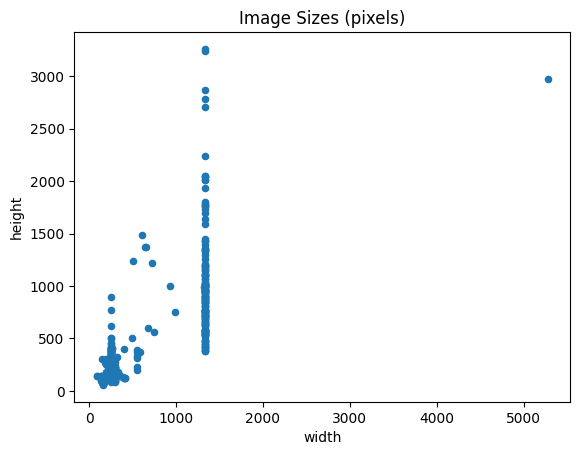

In [26]:
sizes = imagedf.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width', y='height');
plt.title('Image Sizes (pixels)')
# plt.title('Image Sizes (pixels) | {}'.format(Class)
plt.savefig('Size_distribution_of_image_data.png')

C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


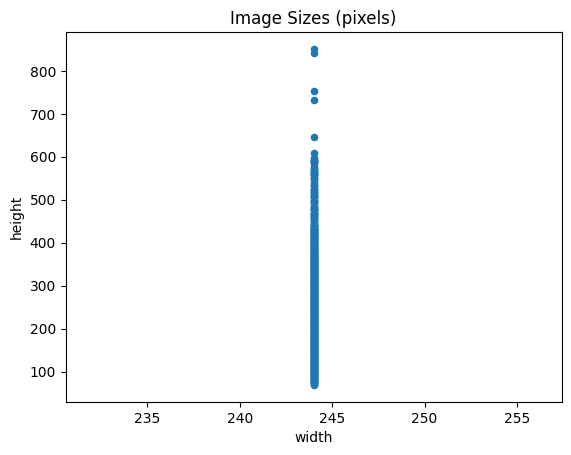

In [27]:
sizes = imagedfSplit.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width', y='height');
plt.title('Image Sizes (pixels)')
# plt.title('Image Sizes (pixels) | {}'.format(Class)
plt.savefig('Size_distribution_of_image_data.png')

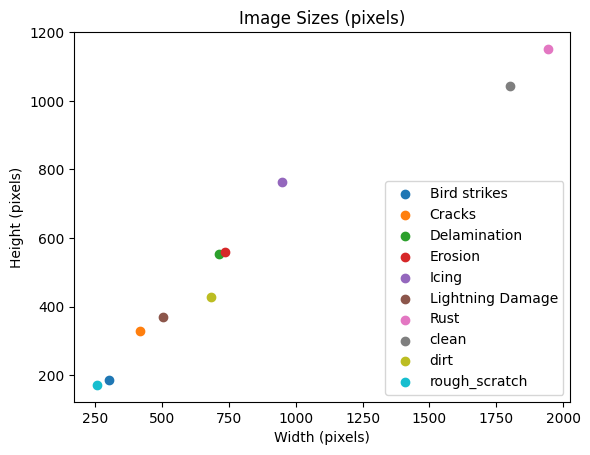

In [28]:
import matplotlib.pyplot as plt

# Group the data by class
class_sizes = imagedf.groupby('typeClass')[['height', 'width']].mean()
# class_sizes = imagedfSplit.groupby('typeClass')[['height', 'width']].size().reset_index().rename(columns={0:'count'})

# Create a scatter plot for each class
for c in class_sizes.index:
    plt.scatter(class_sizes.loc[c, 'width'], class_sizes.loc[c, 'height'], label=c)

# Add labels and title to the plot
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.title('Image Sizes (pixels)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


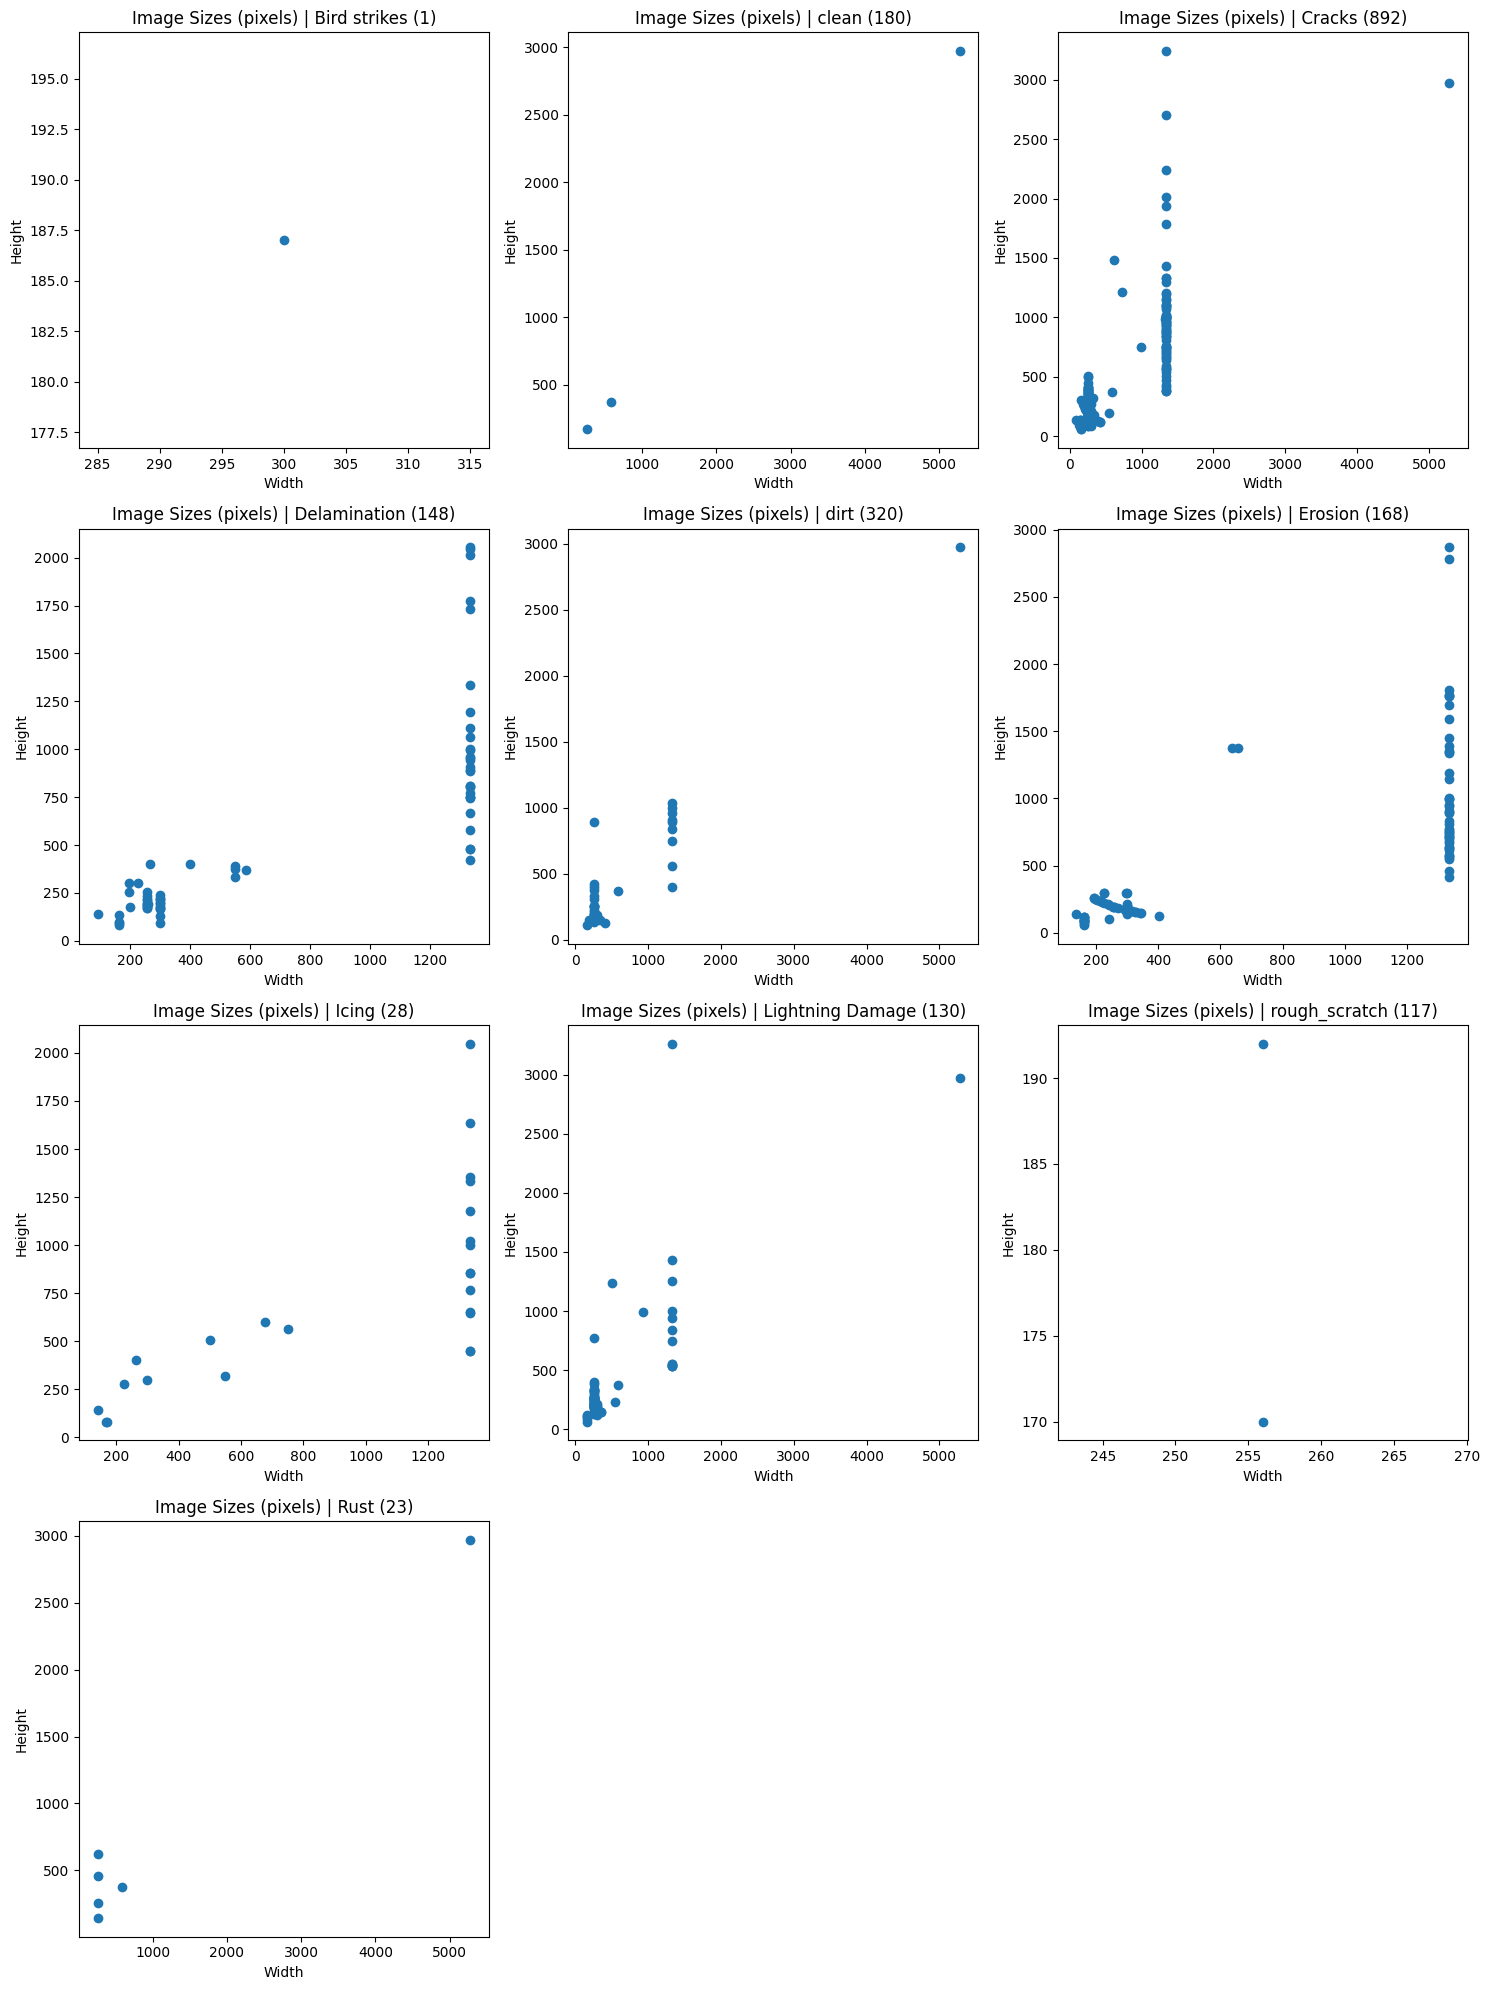

In [78]:
import matplotlib.pyplot as plt

# Get unique classes
classes = imagedf['typeClass'].unique()

# Calculate number of rows needed for subplots
nrows = (len(classes) // 3) + (len(classes) % 3 > 0)

# Create figure and subplots
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5*nrows))

# Iterate over each class and create a scatter plot
for i, Class in enumerate(classes):
    row, col = i // 3, i % 3
    class_df = imagedf[imagedf['typeClass'] == Class]
    sizes = class_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    axs[row, col].scatter(x=sizes['width'], y=sizes['height'])
    axs[row, col].set_title('Image Sizes (pixels) | {} ({})'.format(Class, len(class_df)))
    axs[row, col].set_xlabel('Width')
    axs[row, col].set_ylabel('Height')

# Remove any unused subplots
for i in range(len(classes), nrows*3):
    row, col = i // 3, i % 3
    fig.delaxes(axs[row, col])

plt.tight_layout()
# plt.savefig('Size_distribution_of_image_data.png')
plt.savefig('Size_distribution_of_image_data_by_Class.png', bbox_inches='tight')
plt.show()
